In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
data1=pd.read_csv("Vehicle.csv")
# we read the data here

In [4]:
data1.head()
#we get the top 5 data from dataset

,Hour,Vehicles
0,1,699
1,2,346
2,3,193
3,4,191
4,5,193


C:\Users\hp\AppData\Local\Temp\ipykernel_10780\779410174.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")


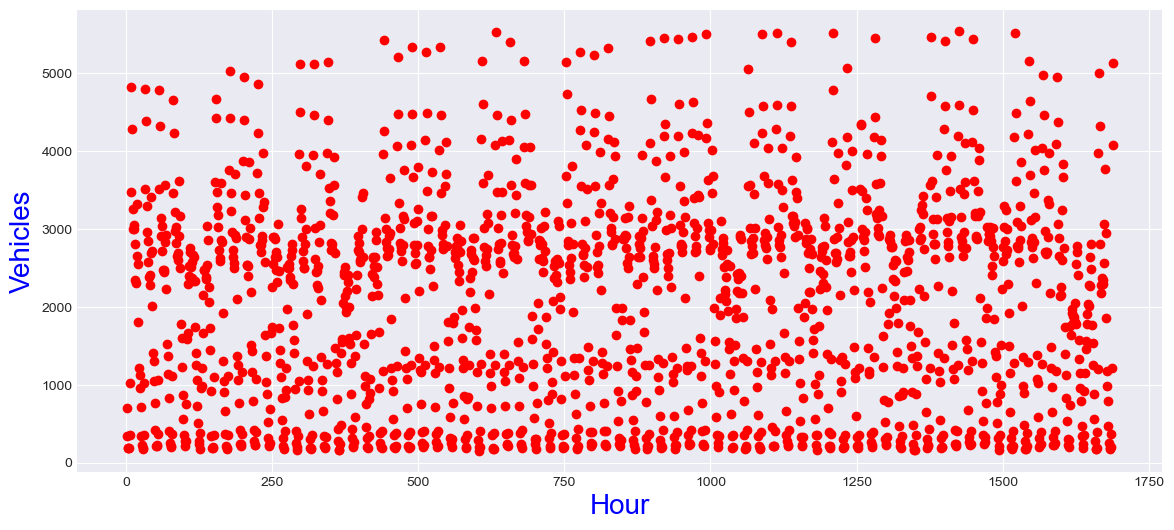

In [26]:
plt.figure(figsize=(14,6))
#width and height of figure in inches width 14 and breadth 6
plt.style.use("seaborn-darkgrid")
#The "seaborn-darkgrid" style is known for its dark background with grid lines, which can enhance the visibility of plots.
plt.scatter(data1["Hour"], data1["Vehicles"], color="red")
#This code creates a scatter plot where each point corresponds to a pair of values from the "Hour" and "Vehicles" columns in your dataset
plt.xlabel("Hour",size=20, color="blue")
#plotting x and label with hour  size 20 and color blue
plt.ylabel("Vehicles",size=20, color="blue")
#plotting Y and label with Vehicle  size 20 and color blue
plt.show()

In [21]:
data1.corr()

,Hour,Vehicles
Hour,1.000000,0.014062
Vehicles,0.014062,1.000000


# another module of LR

In [8]:
import statsmodels.formula.api as smf

In [27]:
model=smf.ols("Vehicles~Hour", data=data1).fit()

In [28]:
model.summary()
#As R square is 0 so this model is worst model. So, we need to make improvement.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Vehicles   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3336
Date:                Thu, 30 Nov 2023   Prob (F-statistic):              0.564
Time:                        02:18:08   Log-Likelihood:                -14557.
No. Observations:                1689   AIC:                         2.912e+04
Df Residuals:                    1687   BIC:                         2.913e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2027.7834     65.231     31.086      0.000    1899.842    2155.725
Hour           0.0386      0.067      0.578      0.564      -0.093       0.170
==============================================================================
Omnibus:                      121.901   Durbin-Watson:                   0.261
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.866
Skew:                           0.240   Prob(JB):                     1.22e-12
Kurtosis:                       2.258   Cond. No.                     1.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
model.resid
#to get the error of model at each point means we get real - predicted data.

0      -1328.821984
1      -1681.860605
2      -1834.899226
3      -1836.937847
4      -1834.976468
           ...     
1684   -1898.859530
1685   -1719.898151
1686    -874.936772
1687    1983.024607
1688    3043.985987
Length: 1689, dtype: float64

C:\Users\hp\AppData\Local\Temp\ipykernel_10780\168717123.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")


Text(0, 0.5, 'Vehicles')

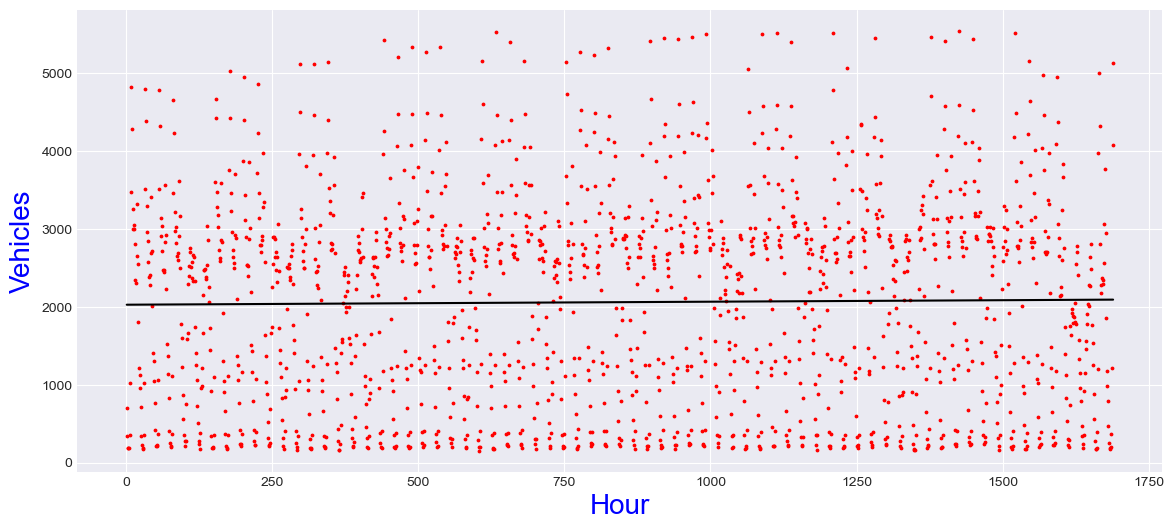

In [19]:
plt.figure(figsize=(14,6))
plt.style.use("seaborn-darkgrid")
plt.scatter(data1["Hour"],data1["Vehicles"],color="red",s=3)
plt.plot(data1["Hour"],model.predict(),color="black")
plt.xlabel("Hour", size=20, color="blue")
plt.ylabel("Vehicles",size=20, color="blue")

In [30]:
model2=smf.ols("Vehicles~np.log(Hour)",data=data1).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Vehicles   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.348
Date:                Thu, 30 Nov 2023   Prob (F-statistic):              0.246
Time:                        02:27:04   Log-Likelihood:                -14556.
No. Observations:                1689   AIC:                         2.912e+04
Df Residuals:                    1687   BIC:                         2.913e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1814.4549    214.348      8.465      0.000    1394.038    2234.872
np.log(Hour)    38.2249     32.924      1.161      0.246     -26.352     102.802
==============================================================================
Omnibus:                      122.357   Durbin-Watson:                   0.261
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.890
Skew:                           0.239   Prob(JB):                     1.20e-12
Kurtosis:                       2.257   Cond. No.                         43.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
model2=smf.ols("np.log(Vehicles)~(Hour)",data=data1).fit()
model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(Vehicles)   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.04257
Date:                Thu, 30 Nov 2023   Prob (F-statistic):              0.837
Time:                        02:28:13   Log-Likelihood:                -2372.9
No. Observations:                1689   AIC:                             4750.
Df Residuals:                    1687   BIC:                             4761.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.2698      0.048    151.334      0.000       7.176       7.364
Hour        1.016e-05   4.92e-05      0.206      0.837   -8.64e-05       0.000
==============================================================================
Omnibus:                      204.065   Durbin-Watson:                   0.183
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.161
Skew:                          -0.872   Prob(JB):                     8.62e-52
Kurtosis:                       2.454   Cond. No.                     1.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
model4=smf.ols("np.log(Vehicles)~Hour+pow(Hour,2)",data=data1).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(Vehicles)   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.248
Date:                Thu, 30 Nov 2023   Prob (F-statistic):              0.287
Time:                        02:29:18   Log-Likelihood:                -2371.7
No. Observations:                1689   AIC:                             4749.
Df Residuals:                    1686   BIC:                             4766.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        7.1856      0.072     99.690      0.000       7.044       7.327
Hour             0.0003      0.000      1.568      0.117   -7.75e-05       0.001
pow(Hour, 2) -1.768e-07   1.13e-07     -1.566      0.118   -3.98e-07    4.46e-08
==============================================================================
Omnibus:                      203.550   Durbin-Watson:                   0.183
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.436
Skew:                          -0.874   Prob(JB):                     7.51e-52
Kurtosis:                       2.459   Cond. No.                     3.83e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.83e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
model5=smf.ols("np.log(Vehicles)~(Hour)",data=data1).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(Vehicles)   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.04257
Date:                Thu, 30 Nov 2023   Prob (F-statistic):              0.837
Time:                        02:30:27   Log-Likelihood:                -2372.9
No. Observations:                1689   AIC:                             4750.
Df Residuals:                    1687   BIC:                             4761.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.2698      0.048    151.334      0.000       7.176       7.364
Hour        1.016e-05   4.92e-05      0.206      0.837   -8.64e-05       0.000
==============================================================================
Omnibus:                      204.065   Durbin-Watson:                   0.183
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.161
Skew:                          -0.872   Prob(JB):                     8.62e-52
Kurtosis:                       2.454   Cond. No.                     1.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\hp\AppData\Local\Temp\ipykernel_10780\2202154473.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")


Text(0, 0.5, 'Vehicles')

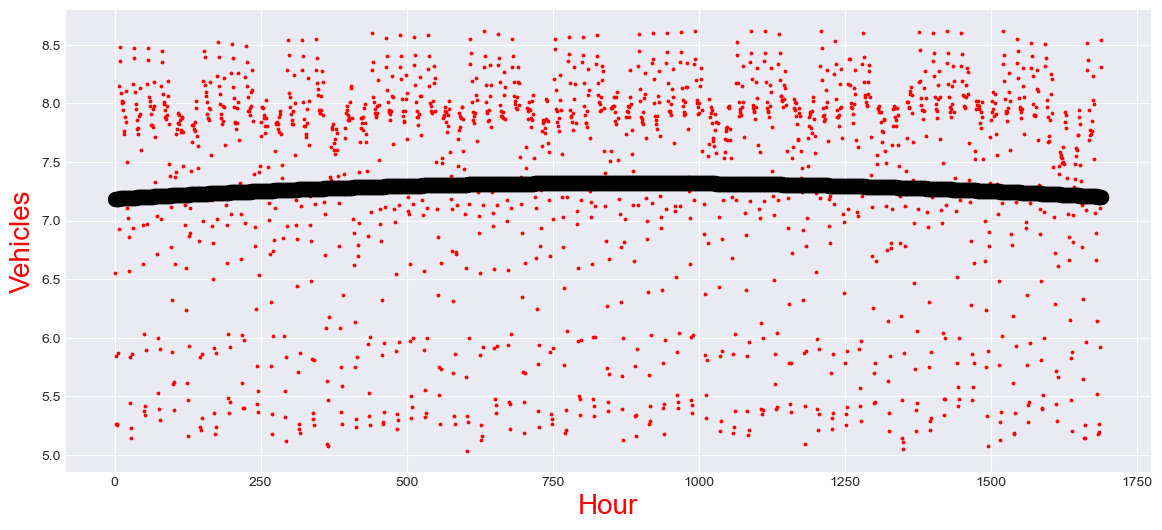

In [37]:
model4=smf.ols("np.log(Vehicles)~Hour+pow(Hour,2)",data=data1).fit()
plt.figure(figsize=(14,6))
plt.style.use("seaborn-darkgrid")

plt.scatter(data1["Hour"],np.log(data1["Vehicles"]),color="red",s=3)
plt.scatter(data1["Hour"],model4.fittedvalues,color="black",s=100)


plt.xlabel("Hour",size=20,color="red")
plt.ylabel("Vehicles",size=20,color="red")

